In [1]:
from pytdx.hq import TdxHq_API
from pytdx.params import TDXParams
from datetime import datetime, timedelta
import pandas as pd
import polars as pl
import os
from tqdm import tqdm

In [2]:
symbol = '002860'

df = pl.read_parquet(f'cn_data_weekly_bar/data/{symbol}.parquet')
df.head()

open,close,high,low,vol,amount,datetime
f64,f64,f64,f64,f64,f64,str
21.41,22.48,23.95,21.32,155485.0,3.49864736e8,"""2020-02-14 15:..."
22.48,23.92,24.26,22.46,237629.0,5.60006528e8,"""2020-02-21 15:..."
24.05,22.99,25.17,22.6,329196.0,7.8997568e8,"""2020-02-28 15:..."
23.3,23.99,25.38,23.3,378570.0,9.26129408e8,"""2020-03-06 15:..."
23.4,23.13,25.95,21.3,362561.0,8.81988864e8,"""2020-03-13 15:..."


In [3]:
len(df)

150

In [4]:
dts = []
for dt_str in df['datetime']:
    dts.append(datetime.strptime(dt_str.split(' ')[0], '%Y-%m-%d'))

df['datetime'] = dts
df.head()

open,close,high,low,vol,amount,datetime
f64,f64,f64,f64,f64,f64,datetime[μs]
21.41,22.48,23.95,21.32,155485.0,3.49864736e8,2020-02-14 00:00:00
22.48,23.92,24.26,22.46,237629.0,5.60006528e8,2020-02-21 00:00:00
24.05,22.99,25.17,22.6,329196.0,7.8997568e8,2020-02-28 00:00:00
23.3,23.99,25.38,23.3,378570.0,9.26129408e8,2020-03-06 00:00:00
23.4,23.13,25.95,21.3,362561.0,8.81988864e8,2020-03-13 00:00:00


In [5]:
df = df.with_column(pl.max([pl.col('close'), pl.col('open')]).alias('concrete_high'))
df = df.with_column(pl.min([pl.col('close'), pl.col('open')]).alias('concrete_low'))
df.head()

open,close,high,low,vol,amount,datetime,concrete_high,concrete_low
f64,f64,f64,f64,f64,f64,datetime[μs],f64,f64
21.41,22.48,23.95,21.32,155485.0,3.49864736e8,2020-02-14 00:00:00,22.48,21.41
22.48,23.92,24.26,22.46,237629.0,5.60006528e8,2020-02-21 00:00:00,23.92,22.48
24.05,22.99,25.17,22.6,329196.0,7.8997568e8,2020-02-28 00:00:00,24.05,22.99
23.3,23.99,25.38,23.3,378570.0,9.26129408e8,2020-03-06 00:00:00,23.99,23.3
23.4,23.13,25.95,21.3,362561.0,8.81988864e8,2020-03-13 00:00:00,23.4,23.13


In [6]:
ls = df['concrete_low']
df['is_pivot_low'] = ((ls <= ls.shift(1)).fill_null(False) & (ls <= ls.shift(-1)).fill_null(False))
df['pivot_low_price'] = df['is_pivot_low'] * df['concrete_low']
df['pivot_low_price'] = df['pivot_low_price'].apply(lambda x: x if x > 0 else None)

hs = df['concrete_high']
df['is_pivot_high'] = ((hs >= hs.shift(1)).fill_null(False) & (hs >= hs.shift(-1)).fill_null(False))
df['pivot_high_price'] = df['is_pivot_high'] * df['concrete_high']
df['pivot_high_price'] = df['pivot_high_price'].apply(lambda x: x if x > 0 else None)

In [7]:
# 只和左边比
df['is_potential_low'] = (ls <= ls.shift(1)).fill_null(False)
df['is_potential_high'] = (hs <= hs.shift(1)).fill_null(False)

In [8]:
df['freq'] = ['1W'] * len(df)
df['symbol'] = [symbol] * len(df)

In [9]:
# df.to_parquet(f'../analyzer.view.server/dump/cn_weekly/compute/{symbol}.1d.parquet')

- Trend Logic
    - 向前找 valid pivot
        - Lower High
        - Higher Low
    - 持续多久
    - 两个valid pivot间间隔多少
        - period
        - pivot
        - price diff
        - revert trend
    - Trend Break
    - 当前 Bar/价
        - Potentially making High/Low
        - Potentially continuing trend
        - Potentially breaking trend
    - 如果趋势延续,预测下一个 pivot 的位置
    - Multi-periods
- Feature
    - 趋势持续的周期
    - 趋势刚开始 / 已持续长时间
    - Reversal
    - Chanel
- Strategy
    - 趋势反转
    - 趋势启动 -> Chanel
- Visual

In [10]:
# df = df[:-1]
df[len(df)-10:]

open,close,high,low,vol,amount,datetime,concrete_high,concrete_low,is_pivot_low,pivot_low_price,is_pivot_high,pivot_high_price,is_potential_low,is_potential_high,freq,symbol
f64,f64,f64,f64,f64,f64,datetime[μs],f64,f64,bool,f64,bool,f64,bool,bool,str,str
12.12,14.9,15.38,12.03,689442.0,9.52305536e8,2022-11-04 00:00:00,14.9,12.12,true,12.12,false,null,true,false,"""1W""","""002860"""
15.14,16.27,17.51,14.91,1.314531e6,2.1598e9,2022-11-11 00:00:00,16.27,15.14,false,null,false,null,false,false,"""1W""","""002860"""
16.11,16.47,17.13,15.68,652694.0,1.0657e9,2022-11-18 00:00:00,16.47,16.11,false,null,true,16.47,false,false,"""1W""","""002860"""
16.35,15.84,17.24,15.58,622350.0,1.0238e9,2022-11-25 00:00:00,16.35,15.84,true,15.84,false,null,true,true,"""1W""","""002860"""
15.85,16.7,17.17,15.4,552080.0,9.0565824e8,2022-12-02 00:00:00,16.7,15.85,false,null,false,null,false,false,"""1W""","""002860"""
16.76,15.09,16.77,15.0,638102.0,1.0237e9,2022-12-09 00:00:00,16.76,15.09,false,null,true,16.76,true,false,"""1W""","""002860"""
14.9,13.59,15.25,13.47,417159.0,6.01372032e8,2022-12-16 00:00:00,14.9,13.59,false,null,false,null,true,true,"""1W""","""002860"""
13.7,12.55,13.84,12.42,287260.0,3.7527168e8,2022-12-23 00:00:00,13.7,12.55,true,12.55,false,null,true,true,"""1W""","""002860"""
12.59,13.0,13.39,12.59,331402.0,4.34896224e8,2022-12-30 00:00:00,13.0,12.59,false,null,false,null,false,true,"""1W""","""002860"""


In [11]:
df['index'] = list(range(len(df)))

In [12]:
MAX_INVALID_NUM = 3


def get_last_valid_pivot_low_price(index, show_print=False, return_price=False, return_length=False):
    """ HL
    """
    if show_print:
        print(index, df['datetime'][index])

    p = df['concrete_low'][index]
    if show_print:
        print(p)

    invalid_num = 0

    last_valid_pivot = None

    df_tmp = df[:index]

    first_valid_index = None

    low_index =  df_tmp[ df_tmp['is_pivot_low'] ][['pivot_low_price', 'index']]['index'].to_list()
    for i in reversed( list(range(len(low_index))) ):
        i_raw = low_index[i]

        cur_price = df['pivot_low_price'][i_raw]

        if cur_price <= p:
            first_valid_index = i_raw
            if last_valid_pivot is None:
                last_valid_pivot = df['pivot_low_price'][i_raw]
            p = cur_price
            if show_print:
                print(i, i_raw, df['datetime'][i_raw], df['pivot_low_price'][i_raw])
            invalid_num = 0
        else:
            if show_print:
                print('-- invalid: ', i, i_raw, df['datetime'][i_raw], df['pivot_low_price'][i_raw])
            invalid_num += 1
            if invalid_num > MAX_INVALID_NUM:
                break

    if show_print:
        print('Last valid pivot price: ', last_valid_pivot)

    if return_price:
        return last_valid_pivot
    if return_length:
        if first_valid_index is None:
            return 0
        return index - first_valid_index

In [13]:
get_last_valid_pivot_low_price(len(df)-1, show_print=True, return_length=True)

149 2023-01-06 00:00:00
12.99
33 147 2022-12-23 00:00:00 12.55
-- invalid:  32 143 2022-11-25 00:00:00 15.84
31 140 2022-11-04 00:00:00 12.12
-- invalid:  30 136 2022-09-30 00:00:00 12.86
-- invalid:  29 133 2022-09-09 00:00:00 15.68
-- invalid:  28 129 2022-08-12 00:00:00 13.85
-- invalid:  27 125 2022-07-15 00:00:00 13.11
Last valid pivot price:  12.55


9

In [14]:
MAX_INVALID_NUM = 3


def get_last_valid_pivot_price(index, show_print=False, return_price=False, return_length=False):
    if show_print:
        print(index, df['datetime'][index])

    p = df['concrete_high'][index]
    if show_print:
        print(p)

    invalid_num = 0

    last_valid_pivot = None

    df_tmp = df[:index]

    first_valid_index = None

    high_index =  df_tmp[ df_tmp['is_pivot_high'] ][['pivot_high_price', 'index']]['index'].to_list()
    for i in reversed( list(range(len(high_index))) ):
        i_raw = high_index[i]

        cur_price = df['pivot_high_price'][i_raw]

        if cur_price >= p:
            first_valid_index = i_raw
            if last_valid_pivot is None:
                last_valid_pivot = df['pivot_high_price'][i_raw]
            p = cur_price
            if show_print:
                print(i, i_raw, df['datetime'][i_raw], df['pivot_high_price'][i_raw])
            invalid_num = 0
        else:
            if show_print:
                print('-- invalid: ', i, i_raw, df['datetime'][i_raw], df['pivot_high_price'][i_raw])
            invalid_num += 1
            if invalid_num > MAX_INVALID_NUM:
                break

    if show_print:
        print('Last valid pivot price: ', last_valid_pivot)

    if return_price:
        return last_valid_pivot
    if return_length:
        if first_valid_index is None:
            return 0
        return index - first_valid_index

In [15]:
get_last_valid_pivot_price(len(df)-7, show_print=True, return_length=True)

143 2022-11-25 00:00:00
16.35
30 142 2022-11-18 00:00:00 16.47
29 134 2022-09-16 00:00:00 17.15
28 133 2022-09-09 00:00:00 17.15
-- invalid:  27 131 2022-08-26 00:00:00 16.46
-- invalid:  26 127 2022-07-29 00:00:00 15.41
25 121 2022-06-17 00:00:00 17.49
-- invalid:  24 118 2022-05-27 00:00:00 16.78
23 105 2022-02-25 00:00:00 19.29
22 96 2021-12-17 00:00:00 26.33
21 93 2021-11-26 00:00:00 26.99
-- invalid:  20 81 2021-09-03 00:00:00 19.65
-- invalid:  19 78 2021-08-13 00:00:00 20.05
-- invalid:  18 72 2021-07-02 00:00:00 16.64
-- invalid:  17 67 2021-05-28 00:00:00 17.17
Last valid pivot price:  16.47


50

In [16]:
df['last_valid_LH_pivot_price'] = df['index'].apply(lambda x: get_last_valid_pivot_price(index=x, return_price=True)).to_list()
df['valid_LH_length'] = df['index'].apply(lambda x: get_last_valid_pivot_price(index=x, return_length=True)).to_list()

In [17]:
df['last_valid_HL_pivot_price'] = df['index'].apply(lambda x: get_last_valid_pivot_low_price(index=x, return_price=True)).to_list()
df['valid_HL_length'] = df['index'].apply(lambda x: get_last_valid_pivot_low_price(index=x, return_length=True)).to_list()

In [18]:
df.head()

open,close,high,low,vol,amount,datetime,concrete_high,concrete_low,is_pivot_low,pivot_low_price,is_pivot_high,pivot_high_price,is_potential_low,is_potential_high,freq,symbol,index,last_valid_LH_pivot_price,valid_LH_length,last_valid_HL_pivot_price,valid_HL_length
f64,f64,f64,f64,f64,f64,datetime[μs],f64,f64,bool,f64,bool,f64,bool,bool,str,str,i64,f64,i64,f64,i64
21.41,22.48,23.95,21.32,155485.0,3.49864736e8,2020-02-14 00:00:00,22.48,21.41,false,null,false,null,false,false,"""1W""","""002860""",0,null,0,null,0
22.48,23.92,24.26,22.46,237629.0,5.60006528e8,2020-02-21 00:00:00,23.92,22.48,false,null,false,null,false,false,"""1W""","""002860""",1,null,0,null,0
24.05,22.99,25.17,22.6,329196.0,7.8997568e8,2020-02-28 00:00:00,24.05,22.99,false,null,true,24.05,false,false,"""1W""","""002860""",2,null,0,null,0
23.3,23.99,25.38,23.3,378570.0,9.26129408e8,2020-03-06 00:00:00,23.99,23.3,false,null,false,null,false,true,"""1W""","""002860""",3,24.05,1,null,0
23.4,23.13,25.95,21.3,362561.0,8.81988864e8,2020-03-13 00:00:00,23.4,23.13,false,null,false,null,true,true,"""1W""","""002860""",4,24.05,2,null,0


逻辑1
- 上一个周期 LH
- 当前价 broke LH
    - last valid LH pivot price
    - if cur > last valid LH pivot
- 当前价 有HL

再拆解
- break 上个周期的 trend

In [19]:
df['last_valid_LH_pivot_price'].tail()

shape: (10,)
Series: 'last_valid_LH_pivot_price' [f64]
[
	17.15
	17.15
	17.15
	16.47
	17.15
	17.15
	16.76
	16.76
	16.76
	16.76
]

In [20]:
# 进仓条件
df['high_broke_last_priod_LH'] = ( \
        (df['concrete_high'] > df['last_valid_LH_pivot_price'].shift()) \
        & (df['valid_LH_length'].shift() > 12) \
        & (df['valid_HL_length'].shift() > 6) \
    ).fill_null(False)
df['high_broke_last_priod_LH'].tail()

shape: (10,)
Series: 'high_broke_last_priod_LH' [bool]
[
	false
	false
	false
	false
	false
	false
	false
	false
	false
	false
]

In [21]:
# 导出 Visual 数据文件
df.to_parquet(f'../analyzer.view.server/dump/cn_weekly/compute/{symbol}_with_length_threshold.1W.parquet')

策略测试
- 日k高点 broke 上个周期 LH
- Entry: 上个周期的 last_valid_LH_price
- Exit: Open of next mkt day

In [58]:
# 进仓条件列类型是 Bool, 和Float相乘会只保留 条件为True的行
# 进仓价是前日的 last_valid_LH_pivot_price 指标
df['entry'] = df['last_valid_LH_pivot_price'].shift() * df['high_broke_last_priod_LH'] * 1.005 # 设定了 0.005 的滑点

# 以下一天的开盘作为出仓价，注意因为最后一天还不知道第二天的开盘价，这里设定了当日收盘价来计算
df['exit'] = df['open'].shift(-1).fill_null(df['close'][-1]) * 0.995 # 设定了 0.005 的滑点

In [59]:
df_pnl = ((df['exit'] - df['entry']) / df['entry'])[ df['high_broke_last_priod_LH'] ]

<AxesSubplot:>

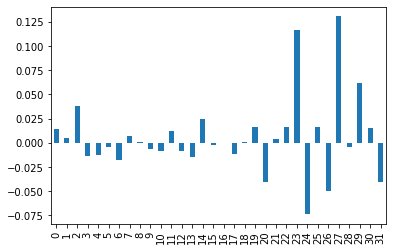

In [60]:
pd.Series( df_pnl ).plot(kind='bar')

In [61]:
len(df_pnl)

32

In [62]:
df_pnl.mean(), df_pnl.std()

(0.005417386525550511, 0.03996492926747724)

In [63]:
import numpy as np

print(f"Sharpe = {np.sqrt(252) * df_pnl.mean() / df_pnl.std()}")

Sharpe = 2.1518452951472486


<AxesSubplot:>

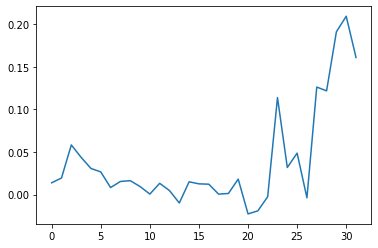

In [64]:
cumret=(np.cumprod(1+df_pnl)-1)
pd.Series(cumret).plot()

<AxesSubplot:>

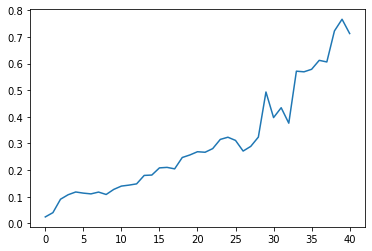

In [29]:
pd.Series(cumret).plot()

- 策略结合SR筹码比例

In [30]:
def get_support_rate(cur_price, date_str):
    fname = f'cn_data_range_vol/period_20/002594/{date_str}.parquet'
    if not os.path.exists(fname):
        # print(fname)
        return 0.0
    df_joint = pl.read_parquet(fname)
    # print(df_joint)


    cur_price = int(cur_price * 100)

    df_above = df_joint.filter(pl.col('range') < cur_price + 20 * 100) \
                        .filter(pl.col('range') > cur_price)
    df_below = df_joint.filter(pl.col('range') > cur_price - 20 * 100) \
                        .filter(pl.col('range') <= cur_price)

    rate = round(df_below['vol'].sum() / (df_below['vol'].sum() + df_above['vol'].sum()), 2)
    # print(rate)
    return rate

In [31]:
def sr_rate(x):
    try:
        date_str = datetime.strftime(x[0] - timedelta(days=1), '%Y-%m-%d')
        entry = x[1]
        if entry is not None and entry > 0.0:
            rate = get_support_rate(entry, date_str)
            return rate
        return 0.0
    except Exception as e:
        print(x)
        return 0.0


sr_rate_list = df[['datetime', 'entry']].apply(lambda x: sr_rate(x))

(datetime.datetime(2021, 2, 2, 0, 0), 15.43)
(datetime.datetime(2021, 6, 8, 0, 0), 17.09)
(datetime.datetime(2021, 7, 16, 0, 0), 17.16)
(datetime.datetime(2021, 8, 24, 0, 0), 19.11)
(datetime.datetime(2021, 8, 26, 0, 0), 19.49)
(datetime.datetime(2021, 9, 8, 0, 0), 19.19)
(datetime.datetime(2021, 9, 9, 0, 0), 19.65)
(datetime.datetime(2021, 12, 15, 0, 0), 25.8)
(datetime.datetime(2021, 12, 17, 0, 0), 26.0)
(datetime.datetime(2022, 1, 6, 0, 0), 24.4)
(datetime.datetime(2022, 2, 23, 0, 0), 19.34)
(datetime.datetime(2022, 2, 24, 0, 0), 19.86)
(datetime.datetime(2022, 3, 3, 0, 0), 19.7)
(datetime.datetime(2022, 5, 12, 0, 0), 13.79)
(datetime.datetime(2022, 5, 19, 0, 0), 14.41)
(datetime.datetime(2022, 7, 14, 0, 0), 14.3)
(datetime.datetime(2022, 7, 21, 0, 0), 13.95)
(datetime.datetime(2022, 7, 28, 0, 0), 14.59)
(datetime.datetime(2022, 10, 18, 0, 0), 13.42)
(datetime.datetime(2022, 10, 26, 0, 0), 13.26)
(datetime.datetime(2022, 11, 30, 0, 0), 16.43)
(datetime.datetime(2023, 1, 5, 0, 0), 13

In [32]:
len(df)

730

In [33]:
df['sr_rate'] = sr_rate_list['apply']

In [34]:
df['sr_rate_valid'] = (df['sr_rate'] > 0.75)

In [35]:
df['trend_sr_valid'] = (df['high_broke_last_priod_LH'] & df['sr_rate_valid'])

In [36]:
# 进仓条件列类型是 Bool, 和Float相乘会只保留 条件为True的行
# 进仓价是前日的 last_valid_LH_pivot_price 指标
df['entry_sr'] = df['last_valid_LH_pivot_price'].shift() * df['trend_sr_valid'] * 1.01

# 以下一天的开盘作为出仓价，注意因为最后一天还不知道第二天的开盘价，这里设定了当日收盘价来计算
df['exit_sr'] = df['open'].shift(-1).fill_null(df['close'][-1]) * 0.99

In [38]:
df_pnl = ((df['exit_sr'] - df['entry_sr']) / df['entry_sr'])[ df['trend_sr_valid'] ]
if len(df_pnl) > 0:
    pd.Series( df_pnl ).plot(kind='bar')

In [39]:
import numpy as np

print(f"Sharpe = {np.sqrt(252) * df_pnl.mean() / df_pnl.std()}")
cumret=(np.cumprod(1+df_pnl)-1)
pd.Series(cumret).plot()

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

In [ ]:
# df = df.drop('sr_rate_list')
df.columns

['open',
 'close',
 'high',
 'low',
 'vol',
 'amount',
 'datetime',
 'concrete_high',
 'concrete_low',
 'is_pivot_low',
 'pivot_low_price',
 'is_pivot_high',
 'pivot_high_price',
 'is_potential_low',
 'is_potential_high',
 'freq',
 'symbol',
 'index',
 'last_valid_LH_pivot_price',
 'valid_LH_length',
 'last_valid_HL_pivot_price',
 'valid_HL_length',
 'high_broke_last_priod_LH',
 'sr_rate',
 'sr_rate_valid',
 'trend_sr_valid',
 'entry_sr',
 'exit_sr']

In [40]:
df = df.drop('exit')
df = df.drop('entry')
df = df.drop('exit_sr')
df = df.drop('entry_sr')

In [41]:
df.head()

open,close,high,low,vol,amount,datetime,concrete_high,concrete_low,is_pivot_low,pivot_low_price,is_pivot_high,pivot_high_price,is_potential_low,is_potential_high,freq,symbol,index,last_valid_LH_pivot_price,valid_LH_length,last_valid_HL_pivot_price,valid_HL_length,high_broke_last_priod_LH,sr_rate,sr_rate_valid,trend_sr_valid
f64,f64,f64,f64,f64,f64,datetime[μs],f64,f64,bool,f64,bool,f64,bool,bool,str,str,i64,f64,i64,f64,i64,bool,f64,bool,bool
22.72,23.58,23.59,22.56,6.174919e6,1.43460736e8,2020-01-09 00:00:00,23.58,22.72,false,null,false,null,false,false,"""1d""","""002860""",0,null,0,null,0,false,0.0,false,false
23.58,23.33,23.9,23.0,5.227828e6,1.22430848e8,2020-01-10 00:00:00,23.58,23.33,false,null,false,null,false,true,"""1d""","""002860""",1,null,0,null,0,false,0.0,false,false
23.33,24.21,24.53,23.26,6.691128e6,1.59991232e8,2020-01-13 00:00:00,24.21,23.33,true,23.33,false,null,true,false,"""1d""","""002860""",2,null,0,null,0,false,0.0,false,false
24.66,25.17,25.69,24.41,9.797385e6,2.45066528e8,2020-01-14 00:00:00,25.17,24.66,false,null,true,25.17,false,false,"""1d""","""002860""",3,null,0,23.33,1,false,0.0,false,false
24.82,24.45,25.02,24.29,6.404212e6,1.57383328e8,2020-01-15 00:00:00,24.82,24.45,false,null,false,null,true,true,"""1d""","""002860""",4,25.17,1,23.33,2,false,0.0,false,false


In [42]:
# 导出 Visual 数据文件
df.to_parquet(f'../analyzer.view.server/dump/cn_pivot/compute/{symbol}_with_length_threshold__with_sr.1d.parquet')